In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key")
project = rf.workspace("harshavardhan-fwcee").project("fruits_det-ursdl")
version = project.version(4)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits_det-4 in yolov8:: 100%|██████████| 2466/2466 [00:02<00:00, 921.33it/s] 


In [4]:
import torch

# Check if CUDA is available
print(f"CUDA available: {torch.cuda.is_available()}")

# Get the number of available GPUs
print(f"GPU count: {torch.cuda.device_count()}")

# Get the name of your GPU
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")  # Should show your GTX 1650

CUDA available: True
GPU count: 1
GPU name: NVIDIA GeForce GTX 1650


In [5]:
from ultralytics import YOLO

# Start with a pre-trained YOLOv8 model (using nano size for your 4GB GPU)
model = YOLO('yolov8n.pt')  # nano model (smallest)
# model = YOLO('yolov8s.pt')  # small model (if nano works well and you want to try something larger)

# Path to your data.yaml file
data_yaml_path = 'C:/Users/mynam/Downloads/DL-II/fruit_counter/Fruits_det-4/data.yaml'

# Train the model with settings optimized for 4GB VRAM
results = model.train(
    data=data_yaml_path,
    epochs=100,              # Adjust based on your needs
    imgsz=640,               # Can reduce to 512 or 416 if memory is an issue
    batch=8,                 # Start with a small batch size for 4GB VRAM
    patience=20,             # Early stopping patience
    save=True,               # Save checkpoints
    device=0,                # Use GPU
    amp=True,                # Use mixed precision training to save memory
    verbose=True             # Display detailed training information
)

100%|██████████| 6.25M/6.25M [00:01<00:00, 5.29MB/s]


New https://pypi.org/project/ultralytics/8.3.94 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.93  Python-3.11.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/mynam/Downloads/DL-II/fruit_counter/Fruits_det-4/data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\mynam\Downloads\DL-II\fruit_counter\Fruits_det-4\train\labels... 764 images, 0 backgrounds, 0 corrupt: 100%|██████████| 764/764 [00:01<00:00, 505.58it/s]


train: New cache created: C:\Users\mynam\Downloads\DL-II\fruit_counter\Fruits_det-4\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2731. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\mynam\Downloads\DL-II\fruit_counter\Fruits_det-4\valid\labels... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<00:00, 308.87it/s]


val: New cache created: C:\Users\mynam\Downloads\DL-II\fruit_counter\Fruits_det-4\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 952. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to c:\Users\mynam\Downloads\DL-II\runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\mynam\Downloads\DL-II\runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss

      1/100      2.12G     0.9773      3.447      1.253         28        640: 100%|██████████| 96/96 [00:30<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]


                   all        280        952      0.596      0.251      0.256      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.47G      1.024      2.333      1.291         29        640: 100%|██████████| 96/96 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.70it/s]


                   all        280        952      0.554      0.533       0.46      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.47G     0.9762      1.971      1.262          8        640: 100%|██████████| 96/96 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]

                   all        280        952      0.699      0.477      0.503      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.47G     0.9971      1.817      1.279         26        640: 100%|██████████| 96/96 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        280        952      0.528      0.588      0.541      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.47G      0.959       1.69      1.252         72        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]

                   all        280        952      0.585      0.622      0.589      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.47G     0.9656      1.547       1.23         33        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]


                   all        280        952      0.749      0.575      0.605      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.47G     0.9377      1.419      1.214         26        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.88it/s]

                   all        280        952      0.662      0.664      0.592      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.47G     0.9506        1.4      1.228         10        640: 100%|██████████| 96/96 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]


                   all        280        952      0.671      0.688      0.647      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.47G      0.886       1.31      1.178         16        640: 100%|██████████| 96/96 [00:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        280        952      0.718       0.71      0.713      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.47G     0.9058      1.246      1.176         25        640: 100%|██████████| 96/96 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]

                   all        280        952      0.622      0.687      0.691      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.47G     0.8995      1.238       1.18         20        640: 100%|██████████| 96/96 [00:29<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        280        952      0.632      0.748      0.731      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.47G     0.8796      1.171      1.171         19        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        280        952      0.824      0.703      0.766      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.47G     0.8856      1.122      1.166         24        640: 100%|██████████| 96/96 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]

                   all        280        952      0.677      0.764      0.726      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.47G      0.878      1.128      1.174         22        640: 100%|██████████| 96/96 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        280        952      0.689      0.742      0.687       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.47G     0.8477      1.064      1.134         41        640: 100%|██████████| 96/96 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]


                   all        280        952      0.621      0.763      0.703      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.47G      0.872      1.018      1.151         13        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]


                   all        280        952      0.658      0.761      0.726       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.47G     0.8654      1.074      1.144         43        640: 100%|██████████| 96/96 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all        280        952      0.688      0.725      0.708      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.47G     0.8678      0.996      1.163         45        640: 100%|██████████| 96/96 [00:28<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]

                   all        280        952       0.77      0.707      0.711      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.47G     0.8478      0.988      1.147         18        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]

                   all        280        952      0.752      0.716      0.758      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.47G     0.8802     0.9693       1.15         49        640: 100%|██████████| 96/96 [00:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]

                   all        280        952      0.787      0.751      0.739      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.47G     0.8621     0.9598      1.152          6        640: 100%|██████████| 96/96 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.74it/s]

                   all        280        952       0.76      0.748      0.744      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.47G     0.8474     0.9253      1.133         23        640: 100%|██████████| 96/96 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        280        952      0.685      0.728      0.731      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.47G     0.8279     0.9055      1.124         61        640: 100%|██████████| 96/96 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all        280        952      0.687      0.824      0.723      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.47G     0.8067     0.9037      1.098         12        640: 100%|██████████| 96/96 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]

                   all        280        952      0.753       0.74      0.725      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.47G     0.8207     0.8667       1.12         38        640: 100%|██████████| 96/96 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        280        952      0.651      0.761      0.683      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.47G      0.819     0.8938       1.12         17        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.77it/s]

                   all        280        952      0.686      0.766      0.739      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.47G     0.8319     0.8906      1.135         17        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]

                   all        280        952      0.684      0.792      0.772      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.47G     0.8167     0.8438      1.109         24        640: 100%|██████████| 96/96 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        280        952      0.699      0.792      0.763      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.47G     0.8044     0.8054      1.109         24        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]

                   all        280        952       0.69      0.845      0.789      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.47G     0.8078     0.8261      1.108         20        640: 100%|██████████| 96/96 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]

                   all        280        952      0.681      0.839      0.789      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.47G     0.7672     0.7985      1.089         14        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]


                   all        280        952       0.67      0.722      0.721      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.47G      0.785     0.8085      1.101         46        640: 100%|██████████| 96/96 [00:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        280        952      0.747      0.786      0.739      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.47G      0.789      0.798      1.103         56        640: 100%|██████████| 96/96 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.75it/s]

                   all        280        952      0.687      0.778      0.759      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.47G     0.7784     0.7675      1.095         28        640: 100%|██████████| 96/96 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        280        952      0.735      0.761      0.759      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.47G     0.7745       0.74      1.093         18        640: 100%|██████████| 96/96 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]


                   all        280        952      0.724      0.816      0.779      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.47G     0.7666     0.7511      1.087         16        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        280        952       0.72      0.761      0.776      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.47G     0.7499     0.7203      1.076         18        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all        280        952      0.711      0.789      0.762      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.47G     0.7663     0.7373      1.088         18        640: 100%|██████████| 96/96 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.65it/s]

                   all        280        952      0.687      0.793      0.769       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.47G      0.757     0.7518      1.088         10        640: 100%|██████████| 96/96 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.76it/s]

                   all        280        952      0.708      0.787      0.772      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.47G     0.7489     0.7116      1.076         12        640: 100%|██████████| 96/96 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]

                   all        280        952      0.673      0.812      0.754      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.47G      0.753     0.6982      1.083         37        640: 100%|██████████| 96/96 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        280        952      0.725      0.812       0.79      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.47G     0.7264     0.6709       1.06         50        640: 100%|██████████| 96/96 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.68it/s]


                   all        280        952      0.783      0.754      0.812      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.47G     0.7417     0.6861      1.067         40        640: 100%|██████████| 96/96 [00:30<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.08it/s]

                   all        280        952      0.713      0.832      0.755      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.47G     0.7515     0.7014      1.086         34        640: 100%|██████████| 96/96 [00:30<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]

                   all        280        952      0.725      0.809      0.766      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.47G     0.7495     0.6711      1.069         34        640: 100%|██████████| 96/96 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        280        952      0.682      0.772      0.777      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.47G     0.7358     0.6573      1.056         26        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]

                   all        280        952      0.715       0.83      0.789      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.47G      0.726     0.6704      1.064         28        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]

                   all        280        952      0.673      0.869       0.76      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.47G     0.7192     0.6608      1.062         16        640: 100%|██████████| 96/96 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        280        952      0.777      0.787      0.794      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.47G     0.7331     0.6317      1.065         35        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.72it/s]

                   all        280        952      0.738      0.802      0.792      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.47G     0.7328     0.6461      1.066         17        640: 100%|██████████| 96/96 [00:28<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]

                   all        280        952      0.774      0.733      0.794      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.47G     0.7584      0.639      1.068         14        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]

                   all        280        952      0.742      0.778      0.807      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.47G     0.7314     0.6277      1.059         15        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.97it/s]

                   all        280        952      0.691      0.799      0.776      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.47G     0.7222     0.6326      1.059         11        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]

                   all        280        952      0.737      0.776        0.8      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.47G      0.709     0.6151      1.051         35        640: 100%|██████████| 96/96 [00:28<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]

                   all        280        952      0.714      0.828      0.784      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.47G     0.7128     0.6132      1.066         46        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]

                   all        280        952      0.691      0.854      0.783      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.47G     0.7123     0.6122      1.053         49        640: 100%|██████████| 96/96 [00:28<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]

                   all        280        952      0.748      0.793      0.804      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.47G     0.7148     0.6177      1.056         11        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]

                   all        280        952       0.69      0.826      0.796      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.47G     0.7049     0.5969      1.049         22        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]

                   all        280        952      0.731      0.778      0.793      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.47G     0.7116     0.5974      1.054         45        640: 100%|██████████| 96/96 [00:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.13it/s]

                   all        280        952       0.77      0.781      0.821      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.7139     0.5948      1.058         15        640: 100%|██████████| 96/96 [00:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]

                   all        280        952      0.706      0.835      0.785      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.47G     0.6835     0.5944      1.053         32        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.11it/s]

                   all        280        952      0.738      0.796        0.8      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.47G     0.6762     0.5573      1.026         18        640: 100%|██████████| 96/96 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]

                   all        280        952        0.7      0.807      0.774      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.47G     0.6966      0.575      1.043         52        640: 100%|██████████| 96/96 [00:28<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.02it/s]

                   all        280        952      0.737      0.841      0.811      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.47G     0.6868     0.5696       1.04         12        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.10it/s]

                   all        280        952       0.74      0.796      0.822      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.47G     0.6883     0.5555      1.033         13        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]

                   all        280        952      0.708      0.861      0.815      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.47G     0.6663     0.5499      1.029         25        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]

                   all        280        952      0.749      0.808      0.805      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.47G     0.6674     0.5505      1.029         19        640: 100%|██████████| 96/96 [00:30<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.69it/s]

                   all        280        952      0.736      0.817      0.815      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.47G     0.6764     0.5451       1.04         23        640: 100%|██████████| 96/96 [00:29<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]

                   all        280        952      0.773      0.768      0.807      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.47G     0.6777     0.5381      1.036         16        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.95it/s]

                   all        280        952      0.738      0.836      0.812      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.47G     0.6605     0.5267      1.023         26        640: 100%|██████████| 96/96 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]

                   all        280        952      0.736      0.825      0.801       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.47G     0.6687     0.5235      1.021         19        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]

                   all        280        952      0.733      0.788        0.8      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.47G       0.66     0.5146      1.024         16        640: 100%|██████████| 96/96 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]

                   all        280        952      0.718       0.82      0.814      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.47G     0.6598     0.5275      1.022         32        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.81it/s]

                   all        280        952      0.731      0.817      0.804      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.47G      0.636      0.515       1.01         53        640: 100%|██████████| 96/96 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.85it/s]

                   all        280        952      0.713      0.819      0.794      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.47G     0.6582     0.5247      1.022         48        640: 100%|██████████| 96/96 [00:29<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.94it/s]

                   all        280        952      0.868      0.706      0.813       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.47G     0.6542     0.5191      1.019         20        640: 100%|██████████| 96/96 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]

                   all        280        952      0.714      0.813       0.79      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.47G     0.6527     0.5194      1.014         39        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]

                   all        280        952      0.709      0.841      0.799       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.47G     0.6478     0.5143      1.026         15        640: 100%|██████████| 96/96 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.83it/s]

                   all        280        952      0.745      0.828      0.812      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.47G      0.644     0.5024      1.016         70        640: 100%|██████████| 96/96 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.86it/s]

                   all        280        952      0.701      0.823      0.783      0.623
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 59, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



79 epochs completed in 0.765 hours.
Optimizer stripped from c:\Users\mynam\Downloads\DL-II\runs\detect\train4\weights\last.pt, 6.3MB
Optimizer stripped from c:\Users\mynam\Downloads\DL-II\runs\detect\train4\weights\best.pt, 6.3MB

Validating c:\Users\mynam\Downloads\DL-II\runs\detect\train4\weights\best.pt...
Ultralytics 8.3.93  Python-3.11.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]


                   all        280        952      0.767       0.78      0.821      0.658
   Apple -52 calories-         77        162      0.916      0.901      0.957      0.774
  Banana -89 calories-        136        210       0.98       0.99      0.994      0.769
  Cherry -50 calories-         18         54      0.801      0.889      0.918      0.724
Dragon fruit -60 calories-          6          6      0.557        0.5      0.432      0.349
    Kiwi -61 calories-         10         34      0.579      0.941      0.875      0.707
   Mango -60 calories-         14         69      0.615      0.783      0.818      0.686
  Orange -47 calories-         82        135      0.903      0.686       0.89      0.737
    Pear -57 calories-         43         43      0.864          1      0.925      0.839
Pineapple -50 calories-         56         56      0.973      0.982      0.987      0.855
Strawberry -32 calories-         15         74      0.911      0.905      0.949      0.751
Sugar apple -9

In [6]:
# Validate the model on your validation set
metrics = model.val()
print(metrics.box.map)    # Mean Average Precision
print(metrics.box.mp)     # Mean Precision
print(metrics.box.mr)     # Mean Recall

Ultralytics 8.3.93  Python-3.11.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\mynam\Downloads\DL-II\fruit_counter\Fruits_det-4\valid\labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 952. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.97it/s]


                   all        280        952      0.767       0.78      0.821      0.658
   Apple -52 calories-         77        162      0.916      0.901      0.957      0.774
  Banana -89 calories-        136        210       0.98       0.99      0.994      0.769
  Cherry -50 calories-         18         54      0.801      0.889      0.918      0.724
Dragon fruit -60 calories-          6          6      0.557        0.5      0.432      0.349
    Kiwi -61 calories-         10         34      0.579      0.941      0.875      0.707
   Mango -60 calories-         14         69      0.615      0.783      0.818      0.686
  Orange -47 calories-         82        135      0.903      0.686       0.89      0.737
    Pear -57 calories-         43         43      0.864          1      0.925      0.839
Pineapple -50 calories-         56         56      0.973      0.982      0.987      0.855
Strawberry -32 calories-         15         74      0.911      0.905      0.949      0.751
Sugar apple -9


image 1/1 c:\Users\mynam\Downloads\DL-II\fruit_counter\apple.png: 640x576 1 Apple -52 calories-, 166.2ms
Speed: 6.4ms preprocess, 166.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 576)
Fruit counts: {'Apple -52 calories-': 1}


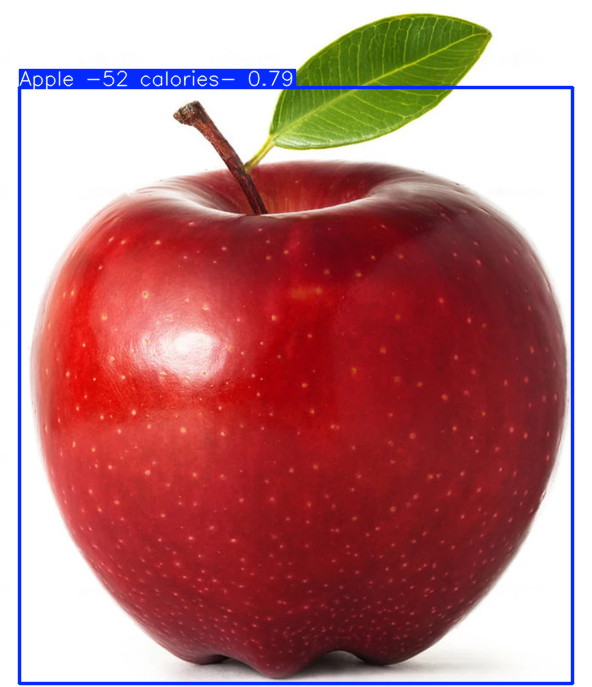

In [9]:
# Function to count fruits in an image
def count_fruits(image_path, model, conf=0.25):
    # Perform inference
    results = model.predict(image_path, conf=conf)[0]
    
    # Initialize counter
    fruit_counts = {}
    
    # Process results
    for box in results.boxes:
        class_id = int(box.cls)
        class_name = model.names[class_id]
        
        # Increment count for this fruit type
        if class_name in fruit_counts:
            fruit_counts[class_name] += 1
        else:
            fruit_counts[class_name] = 1
    
    return fruit_counts, results

# Test on a single image
image_path = 'apple.png'  # Replace with actual test image path
counts, results = count_fruits(image_path, model)

# Display results
print("Fruit counts:", counts)

# Visualize detections (if in Jupyter notebook)
results_image = results.plot()
from PIL import Image
import numpy as np
Image.fromarray(results_image[..., ::-1])  # Convert BGR to RGB for display


image 1/1 c:\Users\mynam\Downloads\DL-II\fruit_counter\banana.png: 448x640 1 Banana -89 calories-, 152.5ms
Speed: 27.4ms preprocess, 152.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Fruit counts: {'Banana -89 calories-': 1}


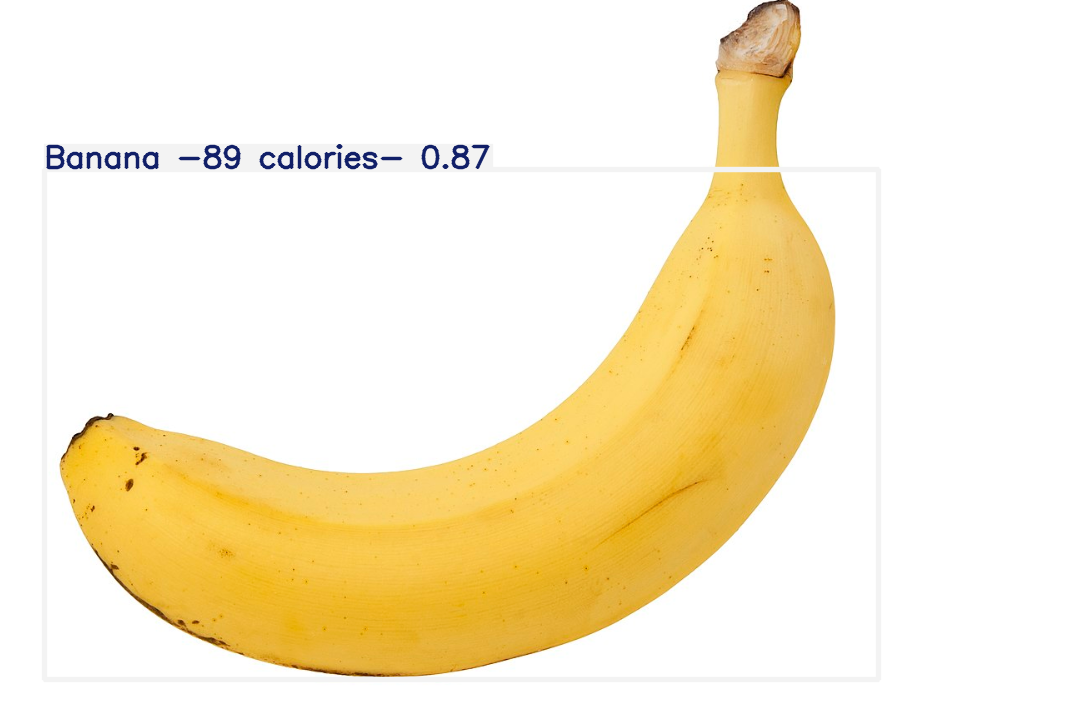

In [10]:
image_path = 'banana.png'  # Replace with actual test image path
counts, results = count_fruits(image_path, model)

# Display results
print("Fruit counts:", counts)

# Visualize detections (if in Jupyter notebook)
results_image = results.plot()
from PIL import Image
import numpy as np
Image.fromarray(results_image[..., ::-1])  # Convert BGR to RGB for display


image 1/1 c:\Users\mynam\Downloads\DL-II\fruit_counter\fruit_count.png: 480x640 2 Mango -60 calories-s, 2 Strawberry -32 calories-s, 37.8ms
Speed: 61.2ms preprocess, 37.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Fruit counts: {'Strawberry -32 calories-': 2, 'Mango -60 calories-': 2}


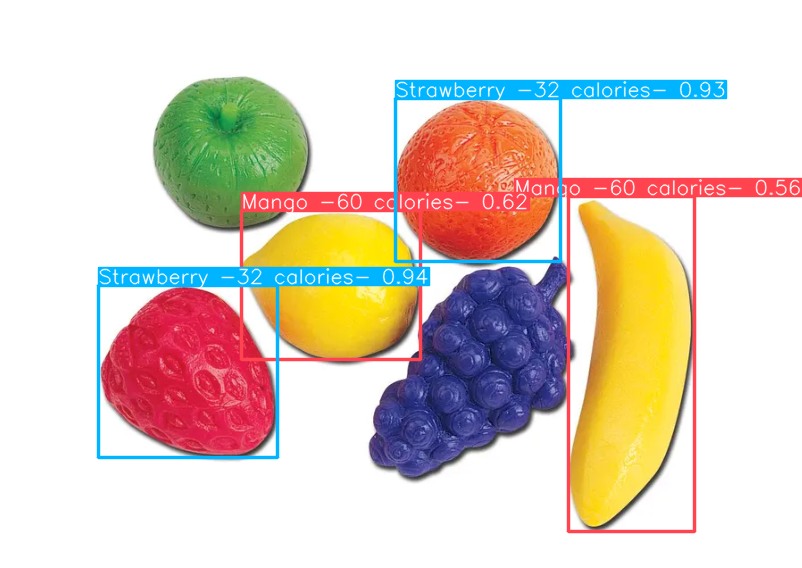

In [11]:
image_path = 'fruit_count.png'  # Replace with actual test image path
counts, results = count_fruits(image_path, model)

# Display results
print("Fruit counts:", counts)

# Visualize detections (if in Jupyter notebook)
results_image = results.plot()
from PIL import Image
import numpy as np
Image.fromarray(results_image[..., ::-1])  # Convert BGR to RGB for display


image 1/1 c:\Users\mynam\Downloads\DL-II\fruit_counter\fruits.webp: 640x640 1 Apple -52 calories-, 1 Banana -89 calories-, 1 Watermelon -30 calories-, 83.8ms
Speed: 7.0ms preprocess, 83.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Fruit counts: {'Apple -52 calories-': 1, 'Banana -89 calories-': 1, 'Watermelon -30 calories-': 1}


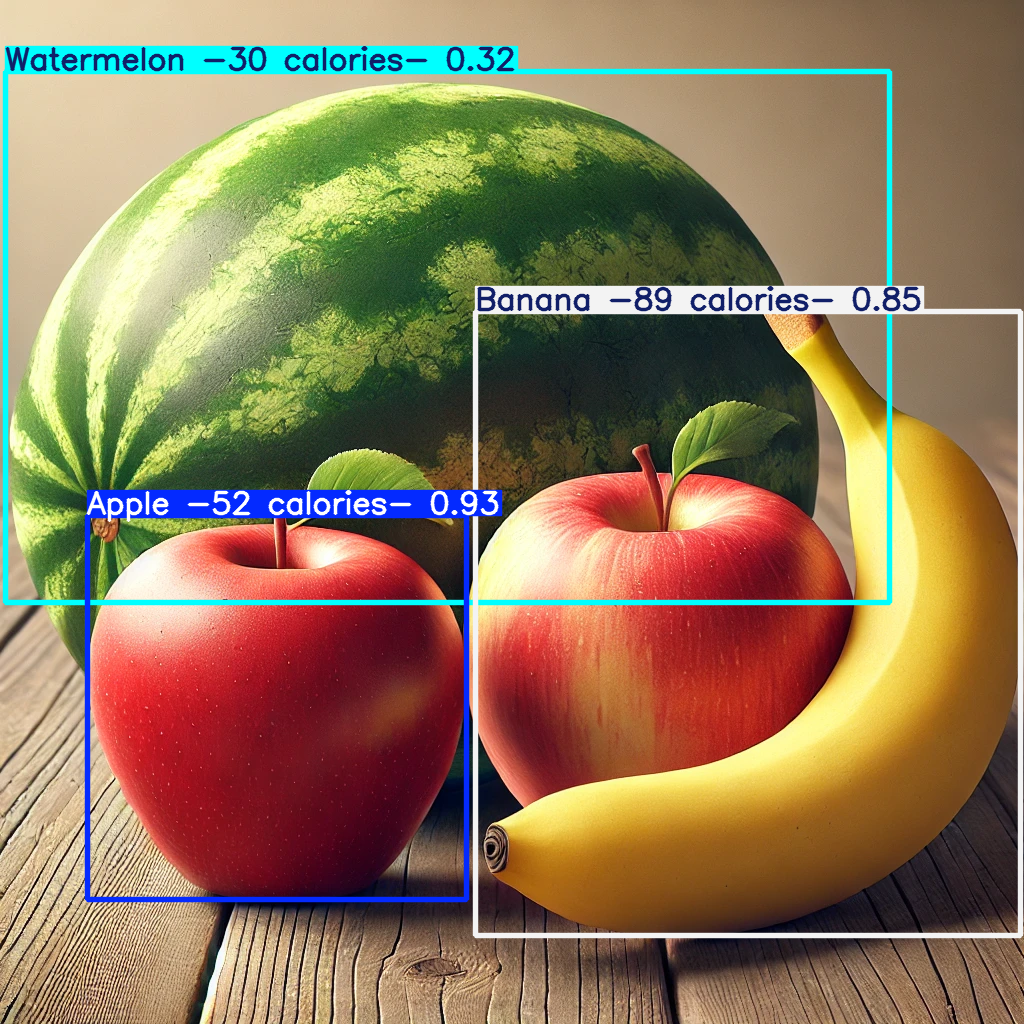

In [12]:
image_path = 'fruits.webp'  # Replace with actual test image path
counts, results = count_fruits(image_path, model)

# Display results
print("Fruit counts:", counts)

# Visualize detections (if in Jupyter notebook)
results_image = results.plot()
from PIL import Image
import numpy as np
Image.fromarray(results_image[..., ::-1])  # Convert BGR to RGB for display


image 1/1 c:\Users\mynam\Downloads\DL-II\fruit_counter\fruits2.webp: 640x640 2 Apple -52 calories-s, 1 Banana -89 calories-, 1 Watermelon -30 calories-, 56.2ms
Speed: 7.8ms preprocess, 56.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Fruit counts: {'Apple -52 calories-': 2, 'Banana -89 calories-': 1, 'Watermelon -30 calories-': 1}


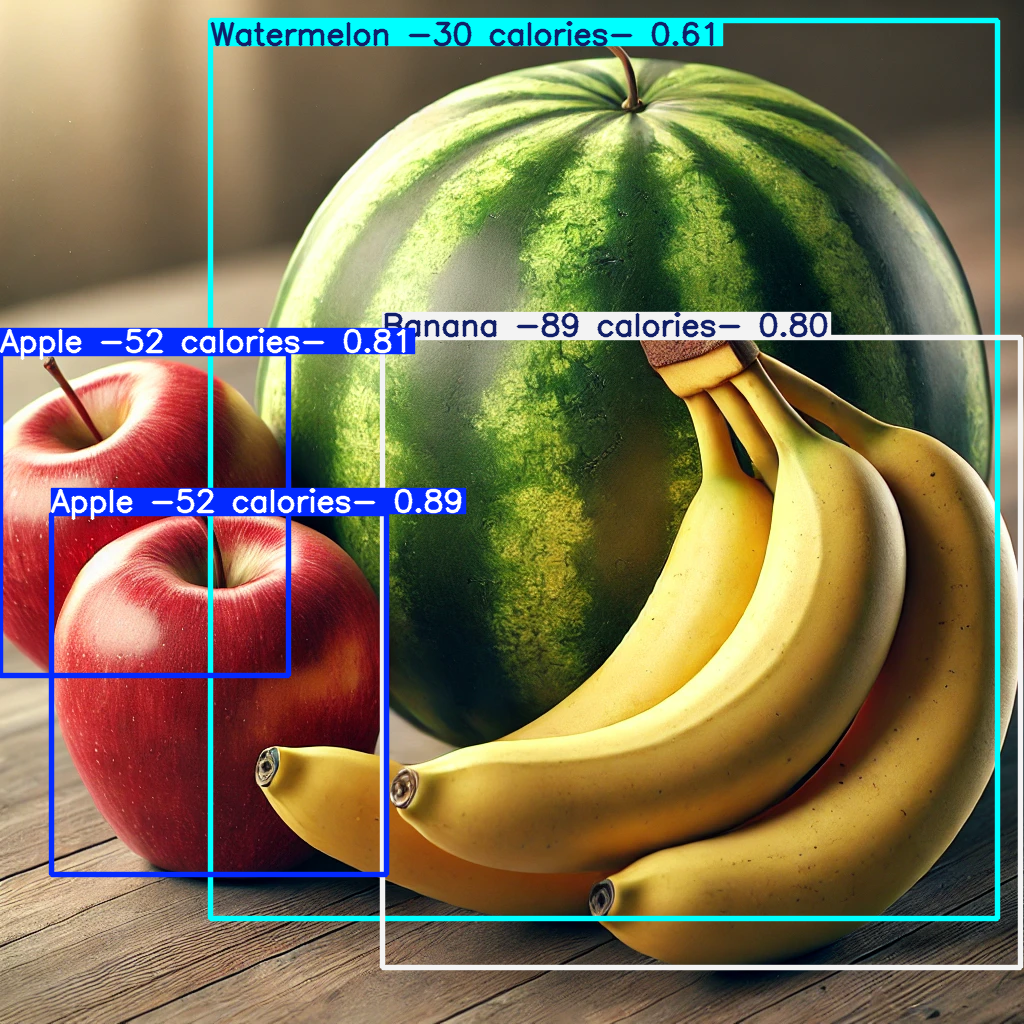

In [13]:
image_path = 'fruits2.webp'  # Replace with actual test image path
counts, results = count_fruits(image_path, model)

# Display results
print("Fruit counts:", counts)

# Visualize detections (if in Jupyter notebook)
results_image = results.plot()
from PIL import Image
import numpy as np
Image.fromarray(results_image[..., ::-1])  # Convert BGR to RGB for display